In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/3sp')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-24 14:21:28 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [2]:
dataarray = dataset.sp.resample(time='1D').interpolate('linear')
dataarray

<xarray.DataArray 'sp' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 97988.625    ,  97929.2578125,  97795.0703125, ...,
          85491.703125 ,  85841.390625 ,  86603.390625 ],
        [ 97906.484375 ,  97664.140625 ,  97554.359375 , ...,
          86486.28125  ,  86957.9609375,  87867.9609375],
        [ 97188.40625  ,  96914.34375  ,  96789.921875 , ...,
          88004.5859375,  87836.25     ,  87935.4609375],
        ...,
        [100593.3984375, 100577.9453125, 100575.5078125, ...,
         100442.953125 , 100470.6015625, 100437.2578125],
        [100598.28125  , 100598.28125  , 100587.703125 , ...,
         100460.03125  , 100490.1171875, 100460.03125  ],
        [100606.40625  , 100628.3671875, 100616.984375 , ...,
         100485.2421875, 100510.453125 , 100495.       ]],

       [[ 97434.       ,  97373.8203125,  97248.578125 , ...,
          85511.21875  ,  85865.7890625,  86627.7890625],
        [ 97346.171875 ,  97111.140625 ,  97011.9296875, ...,
          86504.171875 ,  86979.1015625,  87886.671875 ],
        [ 96649.234375 ,  96381.6796875,  96263.7578125, ...,
          88015.15625  ,  87854.953125 ,  87959.046875 ],
...
        [100617.796875 , 100610.4765625, 100615.359375 , ...,
         100479.546875 , 100539.7265625, 100536.46875  ],
        [100618.609375 , 100625.1171875, 100620.234375 , ...,
         100491.75     , 100544.609375 , 100541.3515625],
        [100625.1171875, 100650.328125 , 100645.4453125, ...,
         100508.8203125, 100546.234375 , 100553.546875 ]],

       [[ 99140.15625  ,  99078.3515625,  98940.1015625, ...,
          86233.3671875,  86587.9375   ,  87360.5078125],
        [ 99016.546875 ,  98768.5078125,  98655.46875  , ...,
          87238.5234375,  87715.890625 ,  88638.09375  ],
        [ 98243.1640625,  97960.96875  ,  97834.109375 , ...,
          88773.90625  ,  88606.375    ,  88707.21875  ],
        ...,
        [100589.328125 , 100584.453125 , 100589.328125 , ...,
         100863.390625 , 100908.1171875, 100894.296875 ],
        [100590.1484375, 100599.90625  , 100598.28125  , ...,
         100859.328125 , 100903.2421875, 100893.484375 ],
        [100591.7734375, 100625.1171875, 100624.3046875, ...,
         100861.765625 , 100895.921875 , 100895.921875 ]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

In [3]:
surface_pressure = dataarray.to_dataset(name='sp')
surface_pressure

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 5936)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Data variables:
    sp         (time, latitude, longitude) float64 9.799e+04 ... 1.009e+05

In [4]:
sp_hPa = surface_pressure.sp / 100

In [10]:
sp_hPa.where(sp_hPa>=700)

<xarray.DataArray 'sp' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 979.88625   ,  979.29257812,  977.95070313, ...,
          854.91703125,  858.41390625,  866.03390625],
        [ 979.06484375,  976.64140625,  975.54359375, ...,
          864.8628125 ,  869.57960938,  878.67960938],
        [ 971.8840625 ,  969.1434375 ,  967.89921875, ...,
          880.04585937,  878.3625    ,  879.35460937],
        ...,
        [1005.93398438, 1005.77945313, 1005.75507812, ...,
         1004.42953125, 1004.70601562, 1004.37257813],
        [1005.9828125 , 1005.9828125 , 1005.87703125, ...,
         1004.6003125 , 1004.90117188, 1004.6003125 ],
        [1006.0640625 , 1006.28367187, 1006.16984375, ...,
         1004.85242188, 1005.10453125, 1004.95      ]],

       [[ 974.34      ,  973.73820313,  972.48578125, ...,
          855.1121875 ,  858.65789063,  866.27789063],
        [ 973.46171875,  971.11140625,  970.11929688, ...,
          865.04171875,  869.79101562,  878.86671875],
        [ 966.49234375,  963.81679688,  962.63757813, ...,
          880.1515625 ,  878.54953125,  879.59046875],
...
        [1006.17796875, 1006.10476563, 1006.15359375, ...,
         1004.79546875, 1005.39726563, 1005.3646875 ],
        [1006.18609375, 1006.25117187, 1006.20234375, ...,
         1004.9175    , 1005.44609375, 1005.41351562],
        [1006.25117187, 1006.50328125, 1006.45445312, ...,
         1005.08820312, 1005.46234375, 1005.53546875]],

       [[ 991.4015625 ,  990.78351562,  989.40101563, ...,
          862.33367188,  865.879375  ,  873.60507812],
        [ 990.16546875,  987.68507813,  986.5546875 , ...,
          872.38523437,  877.15890625,  886.3809375 ],
        [ 982.43164062,  979.6096875 ,  978.34109375, ...,
          887.7390625 ,  886.06375   ,  887.0721875 ],
        ...,
        [1005.89328125, 1005.84453125, 1005.89328125, ...,
         1008.63390625, 1009.08117187, 1008.94296875],
        [1005.90148437, 1005.9990625 , 1005.9828125 , ...,
         1008.59328125, 1009.03242187, 1008.93484375],
        [1005.91773438, 1006.25117187, 1006.24304688, ...,
         1008.61765625, 1008.95921875, 1008.95921875]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31

In [11]:
sp_hPa.min()

<xarray.DataArray 'sp' ()>
array(491.59804688)

In [8]:
t = sp_hPa.sel(time=slice('2013-7-4', '2013-7-9'))
t

<xarray.DataArray 'sp' (time: 6, latitude: 101, longitude: 181)>
array([[[ 980.3009375 ,  979.6340625 ,  978.2271875 , ...,
          848.06148437,  851.31445312,  858.64164063],
        [ 979.39828125,  976.90164063,  975.755     , ...,
          857.8771875 ,  862.36625   ,  871.18164062],
        [ 972.14421875,  969.33046875,  968.061875  , ...,
          872.856875  ,  871.0840625 ,  871.97046875],
        ...,
        [1000.90820312, 1000.835     , 1000.85125   , ...,
         1008.16226563, 1008.50382813, 1008.21101562],
        [1000.95703125, 1001.07085938, 1001.06273437, ...,
         1008.1134375 , 1008.446875  , 1008.19476562],
        [1000.99765625, 1001.35546875, 1001.34734375, ...,
         1008.1378125 , 1008.36554687, 1008.23546875]],

       [[ 981.16296875,  980.46359375,  978.99164062, ...,
          849.97257813,  853.323125  ,  860.73164062],
        [ 980.3253125 ,  977.73929688,  976.51945313, ...,
          859.9834375 ,  864.52945313,  873.40179687],
        [ 973.07132813,  970.17625   ,  968.79375   , ...,
          875.2234375 ,  873.475     ,  874.31257812],
...
        [1002.33140625, 1002.27445313, 1002.34765625, ...,
         1011.04921875, 1011.44765625, 1011.20375   ],
        [1002.38828125, 1002.46960938, 1002.44523438, ...,
         1011.04109375, 1011.41515625, 1011.23625   ],
        [1002.47773437, 1002.77054688, 1002.74609375, ...,
         1011.08171875, 1011.35007812, 1011.285     ]],

       [[ 977.62546875,  977.05617188,  975.730625  , ...,
          854.49414062,  857.92601562,  865.42398438],
        [ 976.66578125,  974.26679687,  973.17703125, ...,
          864.30171875,  868.9453125 ,  877.91523437],
        [ 969.43617188,  966.72      ,  965.47578125, ...,
          879.34648438,  877.63054688,  878.57390625],
        ...,
        [1001.42054688, 1001.43679688, 1001.60757813, ...,
         1009.08117187, 1009.42273438, 1009.20320312],
        [1001.51      , 1001.65640625, 1001.69703125, ...,
         1009.04054688, 1009.34953125, 1009.1625    ],
        [1001.63203125, 1001.96546875, 1002.00609375, ...,
         1009.08117187, 1009.29265625, 1009.186875  ]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09

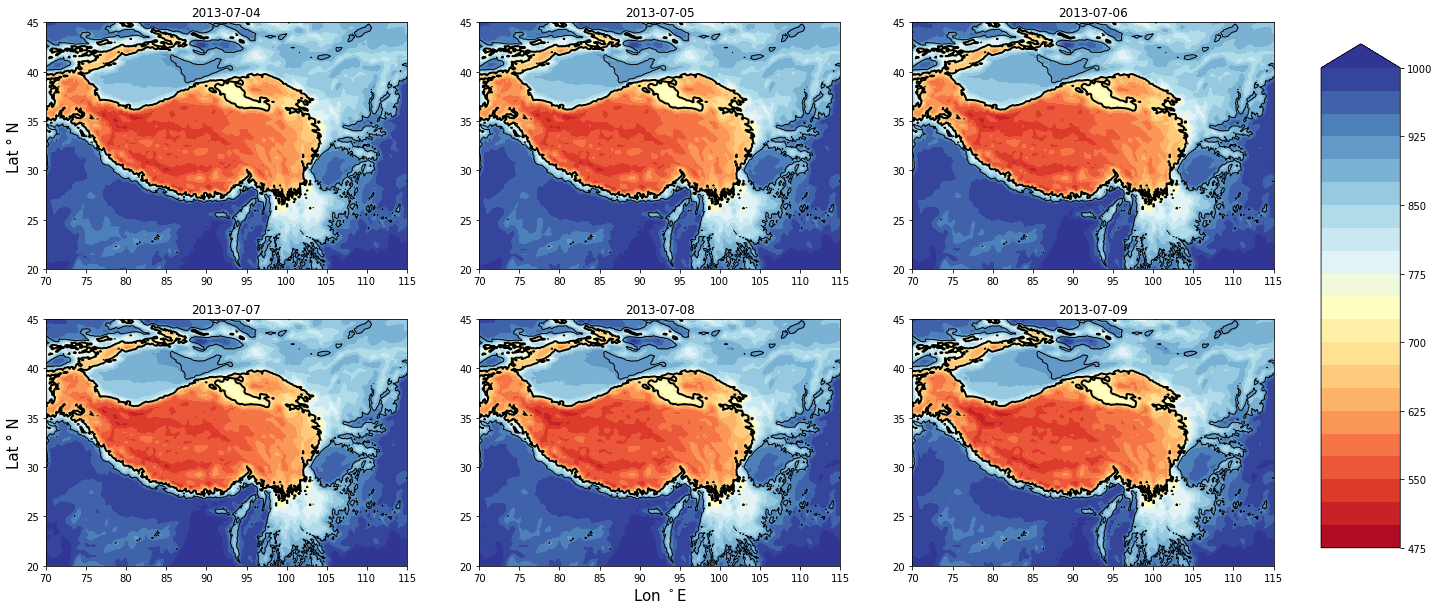

In [9]:
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Sp/sp0409july2013.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

m=ax1.contourf(t.longitude,t.latitude,t[0], cmap=plt.cm.RdYlBu, levels=20, extend='max')
m=ax2.contourf(t.longitude,t.latitude,t[1], cmap=plt.cm.RdYlBu, levels=20, extend='max')
m=ax3.contourf(t.longitude,t.latitude,t[2], cmap=plt.cm.RdYlBu, levels=20, extend='max')
m=ax4.contourf(t.longitude,t.latitude,t[3], cmap=plt.cm.RdYlBu, levels=20, extend='max')
m=ax5.contourf(t.longitude,t.latitude,t[4], cmap=plt.cm.RdYlBu, levels=20, extend='max')
m=ax6.contourf(t.longitude,t.latitude,t[5], cmap=plt.cm.RdYlBu, levels=20, extend='max')
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
fig.colorbar(m,cax=cbar_ax)
ax1.set_title(str(t.time.values[0])[0:10])
ax2.set_title(str(t.time.values[1])[0:10])
ax3.set_title(str(t.time.values[2])[0:10])
ax4.set_title(str(t.time.values[3])[0:10])
ax5.set_title(str(t.time.values[4])[0:10])
ax6.set_title(str(t.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')